In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

In [ ]:
fig = plt.figure(figsize=(15, 7))
boxplot = sns.scatterplot(sber_data, x='kremlin_km', y='price_doc')

In [17]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3, right=3)
outliers.shape[0]


92

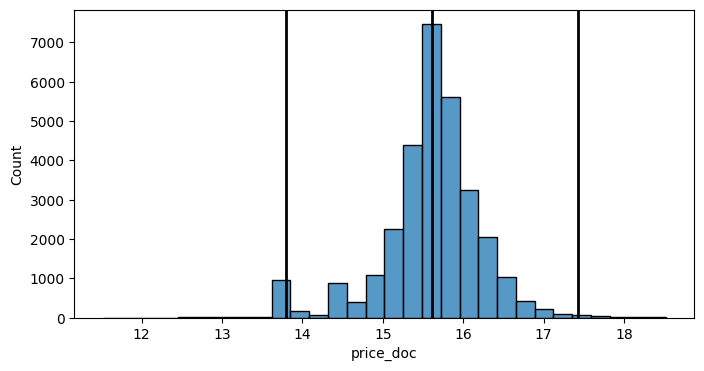

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
log_price = np.log(sber_data['price_doc']+1)
hplot = sns.histplot(log_price, bins=30, ax=ax)
hplot.axvline(log_price.mean(), color='k', lw=2)
hplot.axvline(log_price.mean() + log_price.std() * 3, color='k', lw=2)
hplot.axvline(log_price.mean() - log_price.std() * 3, color='k', lw=2)
